In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re
import os, sys, email
import gensim
from gensim.models import Doc2Vec
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import nltk
from string import punctuation
import timeit
from sklearn.cluster import KMeans
from sklearn import metrics
import pylab as pl
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [3]:
data = pd.read_csv('toi_2010_18.csv')

In [4]:
#Data cleaning
def email_cleaning(text):
    email = text.lower()    
    # clean and tokenize document string
    email_content = email.split()    
    word_list = []
    for i in email_content:
        x = 0
        if (('http' not in i) and ('@' not in i) and ('<.*?>' not in i) and i.isalnum() and (not i in stop_words)):
            word_list += [i]
        
    return word_list 

#Data Pre-processing
def preprocessing(text):    
    # remove numbers
    number_tokens = [re.sub(r'[\d]', ' ', i) for i in text]
    number_tokens = ' '.join(number_tokens).split()
     # stem tokens
    stemmed_tokens = [p_stemmer.stem(i) for i in number_tokens]
    # remove empty
    length_tokens = [i for i in stemmed_tokens if len(i) > 1]
    return length_tokens

In [5]:
LabeledSentence1 = gensim.models.doc2vec.TaggedDocument
all_content = []
texts = []
j=0
k=0
tokenizer = RegexpTokenizer(r'\w+')
stop_words = set(stopwords.words('english'))
p_stemmer = PorterStemmer()
for em in data.TEXT:           
    #Data cleaning
    clean_content = email_cleaning(em)
    
    #Pre-processing
    processed_email = preprocessing(clean_content)
    
    # add tokens to list
    if processed_email:
        all_content.append(LabeledSentence1(processed_email,[j]))
        j+=1
        
    k+=1

print("Number of emails processed: ", k)
print("Number of non-empty emails vectors: ", j)

Number of emails processed:  1228
Number of non-empty emails vectors:  1228


In [6]:
print(all_content[278])

TaggedDocument(['hiv', 'saadhan', 'use', 'dissemin', 'inform', 'tb', 'one', 'xxdr', 'extens', 'drug', 'tb', 'patient', 'test', 'posit', 'health', 'offici', 'thought', 'logic', 'club', 'inform', 'system', 'dr', 'project', 'mumbai', 'district', 'aid', 'control', 'societi', 'helplin', 'later', 'extend', 'even', 'peopl', 'get', 'inform', 'right', 'symptom', 'treatment', 'test', 'mdac', 'talk', 'world', 'health', 'organ', 'prepar', 'modul', 'helplin', 'train', 'like', 'start', 'helplin', 'would', 'open', 'tb', 'queri', 'addit', 'project', 'director', 'dr', 'harish', 'pathak', 'said', 'saadhan', 'get', 'averag', 'call', 'per', 'day', 'call', 'diseas', 'campaign', 'helplin', 'use', 'thought', 'util', 'tb', 'helplin', 'judg', 'nation', 'aid', 'control', 'organ', 'request', 'increas', 'exist', 'strength', 'four', 'pathak', 'helplin', 'also', 'counsel', 'patient', 'import', 'go', 'tb', 'test', 'test', 'posit', 'hiv', 'vice'], [278])


In [7]:
d2v_model = Doc2Vec(all_content, size = 2000, window = 10, min_count = 500, workers=7, dm = 1, 
                alpha=0.025, min_alpha=0.001)

/home/rajaswa-pc/anaconda3/lib/python3.6/site-packages/gensim/models/doc2vec.py:366: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")


In [8]:
d2v_model.train(all_content, total_examples=d2v_model.corpus_count, epochs=10, start_alpha=0.002, end_alpha=-0.016)

In [9]:
# shows the similar docs with id = 99
print (d2v_model.docvecs.most_similar(99))
#print(all_content[282]
#print(all_content[1])

[(310, 0.9993970394134521), (359, 0.9993425011634827), (223, 0.9993282556533813), (360, 0.9993183612823486), (297, 0.999262273311615), (434, 0.9992568492889404), (222, 0.9992508292198181), (427, 0.9992440938949585), (66, 0.999208927154541), (763, 0.9992027282714844)]


In [10]:
kmeans_model = KMeans(n_clusters=4, init='k-means++', max_iter=100)  
X = kmeans_model.fit(d2v_model.docvecs.doctag_syn0)
labels=kmeans_model.labels_.tolist()

/home/rajaswa-pc/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `doctag_syn0` (Attribute will be removed in 4.0.0, use docvecs.vectors_docs instead).
  


In [11]:
l = kmeans_model.fit_predict(d2v_model.docvecs.doctag_syn0)
pca = PCA(n_components=2).fit(d2v_model.docvecs.doctag_syn0)
datapoint = pca.transform(d2v_model.docvecs.doctag_syn0)

/home/rajaswa-pc/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `doctag_syn0` (Attribute will be removed in 4.0.0, use docvecs.vectors_docs instead).
  """Entry point for launching an IPython kernel.
/home/rajaswa-pc/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `doctag_syn0` (Attribute will be removed in 4.0.0, use docvecs.vectors_docs instead).
  
/home/rajaswa-pc/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `doctag_syn0` (Attribute will be removed in 4.0.0, use docvecs.vectors_docs instead).
  This is separate from the ipykernel package so we can avoid doing imports until


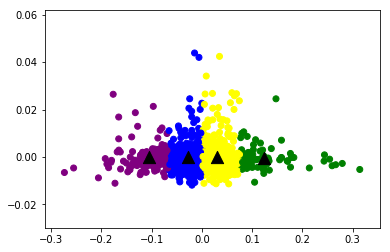

In [12]:
plt.figure
label1 = ["#FFFF00", "#008000", "#0000FF", "#800080"]
color = [label1[i] for i in labels]
plt.scatter(datapoint[:, 0], datapoint[:, 1], c=color)

centroids = kmeans_model.cluster_centers_
centroidpoint = pca.transform(centroids)
plt.scatter(centroidpoint[:, 0], centroidpoint[:, 1], marker='^', s=150, c='#000000')
plt.savefig('pca.png', dpi=200)
plt.show()

In [16]:
order_centroids = kmeans_model.cluster_centers_.argsort()[:, ::-1]
#terms = d2v_model.get_feature_names()
order_centroids.shape

(4, 2000)

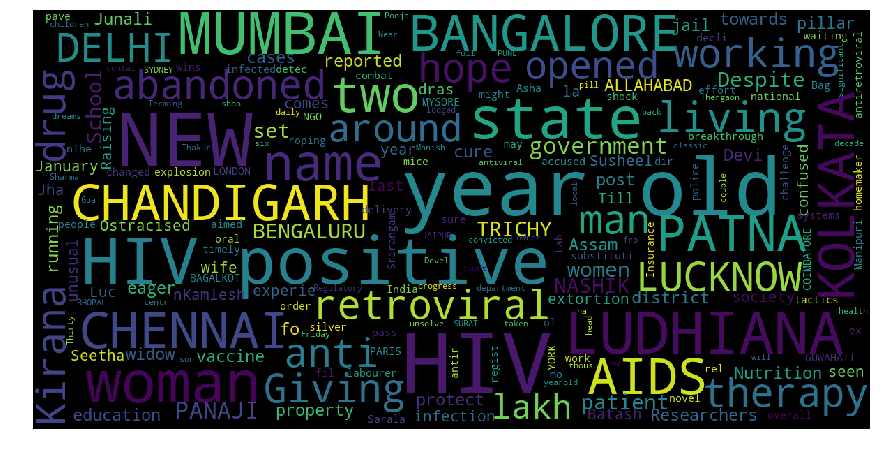

In [19]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='black',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
).generate(str(data))

    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.savefig('wordcloud.png', dpi=400)
    plt.show()

show_wordcloud(data['TEXT'])